In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [52]:
amazon = pd.read_csv("AmazonFoodCategory Dataset.csv")

In [53]:
# 전처리
amazon = amazon[amazon['Discount Amount'] >=0]
amazon = amazon[amazon['Sales Price'] > 0]
amazon = amazon[amazon['Sales Quantity'] > 0]
amazon.drop(['Line Number','Sales Rep','Invoice Date', 'Order Number','Item Number', 'Item Class', 'Promised Delivery Date'], axis = 1, inplace = True)
amazon = amazon[amazon['Sales Cost Amount'] > 0]
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64223 entries, 0 to 65279
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Custkey                           64223 non-null  int64  
 1   DateKey                           64223 non-null  object 
 2   Discount Amount                   64223 non-null  float64
 3   Invoice Number                    64223 non-null  int64  
 4   Item                              64223 non-null  object 
 5   List Price                        64223 non-null  float64
 6   Sales Amount                      64223 non-null  float64
 7   Sales Amount Based on List Price  64223 non-null  float64
 8   Sales Cost Amount                 64223 non-null  float64
 9   Sales Margin Amount               64223 non-null  float64
 10  Sales Price                       64223 non-null  float64
 11  Sales Quantity                    64223 non-null  int64  
 12  U/M      

In [54]:
# 이상치 처리, 할인율이 0보다 작으면 덤탱이?
amazon[amazon['Discount Amount'] < 0]

# 이상치 처리, 판매금액이 0 보다 작으면 돈주고 물건을 팔았을까?
amazon[amazon['Sales Amount'] <= 0]

# 이상치 처리, 할인 적용된 판매금액이 과연 0보다 작을까?
amazon[amazon['Sales Amount Based on List Price'] <= 0]

# 이상치 처리: 판매 비용이 과연 0보다 작을까?
amazon[amazon['Sales Cost Amount'] <= 0]

# 마진이 0보다 작을 수 있을까? 가능은 할수도 있긴 할 것 같은데 통상적으로 저러진 않을것 같다. 
amazon[amazon['Sales Margin Amount'] <= 0]

# 이상치 처리: 원판매가가 할인도 적용안받았는데 음수?
amazon[amazon['Sales Price'] <= 0]

# 이상치 처리: 물건을 0개 팔았으면 굳이 데이터로 기록할 이유가 있을까?
amazon[amazon['Sales Quantity'] <= 0]

# 이상치 처리: 판매액이 과연 음수일까? 
amazon[amazon['Sales Price'] <= 0]

,Custkey,DateKey,Discount Amount,Invoice Number,Item,List Price,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,U/M


In [55]:
# 피봇 컬럼을 합쳐보자 (key = DateKey + Custkey)
a1 = amazon['DateKey'].str.replace('/','')
a2 = amazon['Custkey']
a1 = a1.astype('str')
a2 = a2.astype('str')

amazon['key'] = a2 +'-'+ a1
amazon['key'].str.startswith('10016588').value_counts()

key
False    63522
True       701
Name: count, dtype: int64

In [56]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64223 entries, 0 to 65279
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Custkey                           64223 non-null  int64  
 1   DateKey                           64223 non-null  object 
 2   Discount Amount                   64223 non-null  float64
 3   Invoice Number                    64223 non-null  int64  
 4   Item                              64223 non-null  object 
 5   List Price                        64223 non-null  float64
 6   Sales Amount                      64223 non-null  float64
 7   Sales Amount Based on List Price  64223 non-null  float64
 8   Sales Cost Amount                 64223 non-null  float64
 9   Sales Margin Amount               64223 non-null  float64
 10  Sales Price                       64223 non-null  float64
 11  Sales Quantity                    64223 non-null  int64  
 12  U/M      

In [57]:
# 이상치를 처리해보자
# 사실상 Discount Amount의 이상치만 처리해도 거의 대부분의 이상치가 날아간다.
# 의외로 Sales Cost Amount의 이상치를 처리했을때 200개 정도 더 날아갔다.
amazon1 = amazon[amazon['Discount Amount'] >=0]
amazon1 = amazon1[amazon1['Sales Price'] > 0]
amazon1 = amazon1[amazon1['Sales Quantity'] > 0]
#amazon1.drop(['Item Number', 'Item Class', 'Promised Delivery Date'], axis = 1, inplace = True)
amazon1 = amazon1[amazon1['Sales Cost Amount'] > 0]

# 데이터가 2018년 4월부터 12월까지 누락이 되어있으니, 18년 3월까지만의 데이터를 활용
amazon1['DateKey'] = pd.to_datetime(amazon1['DateKey'])
amazon1['year'] = amazon1['DateKey'].dt.year
amazon1['month'] = amazon1['DateKey'].dt.month
amazon1['day'] = amazon1['DateKey'].dt.day

In [58]:
amazon1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64223 entries, 0 to 65279
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           64223 non-null  int64         
 1   DateKey                           64223 non-null  datetime64[ns]
 2   Discount Amount                   64223 non-null  float64       
 3   Invoice Number                    64223 non-null  int64         
 4   Item                              64223 non-null  object        
 5   List Price                        64223 non-null  float64       
 6   Sales Amount                      64223 non-null  float64       
 7   Sales Amount Based on List Price  64223 non-null  float64       
 8   Sales Cost Amount                 64223 non-null  float64       
 9   Sales Margin Amount               64223 non-null  float64       
 10  Sales Price                       64223 non-null  f

In [59]:
# 2017년 자료만
amazon2 = amazon1[amazon1['year'] == 2017]
amazon2.info()

# 2018년 자료만
amazon3 = amazon1[amazon1['year'] == 2018] 
amazon3 = amazon3[amazon3['month'] <= 3]
amazon3.info()

# 2018년 3월까지의 자료 합치기
amazon4 = pd.concat([amazon2, amazon3])
amazon4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30001 entries, 34707 to 65279
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           30001 non-null  int64         
 1   DateKey                           30001 non-null  datetime64[ns]
 2   Discount Amount                   30001 non-null  float64       
 3   Invoice Number                    30001 non-null  int64         
 4   Item                              30001 non-null  object        
 5   List Price                        30001 non-null  float64       
 6   Sales Amount                      30001 non-null  float64       
 7   Sales Amount Based on List Price  30001 non-null  float64       
 8   Sales Cost Amount                 30001 non-null  float64       
 9   Sales Margin Amount               30001 non-null  float64       
 10  Sales Price                       30001 non-nul

In [60]:
# 2019년 자료만
amazon5 = amazon1[amazon1['year'] == 2019]
amazon5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27916 entries, 0 to 28020
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           27916 non-null  int64         
 1   DateKey                           27916 non-null  datetime64[ns]
 2   Discount Amount                   27916 non-null  float64       
 3   Invoice Number                    27916 non-null  int64         
 4   Item                              27916 non-null  object        
 5   List Price                        27916 non-null  float64       
 6   Sales Amount                      27916 non-null  float64       
 7   Sales Amount Based on List Price  27916 non-null  float64       
 8   Sales Cost Amount                 27916 non-null  float64       
 9   Sales Margin Amount               27916 non-null  float64       
 10  Sales Price                       27916 non-null  f

In [61]:
# 임무를 다 했으니 산화하라
amazon4.drop(['year', 'month', 'day'], axis = 1, inplace = True)
amazon4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36307 entries, 34707 to 34705
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           36307 non-null  int64         
 1   DateKey                           36307 non-null  datetime64[ns]
 2   Discount Amount                   36307 non-null  float64       
 3   Invoice Number                    36307 non-null  int64         
 4   Item                              36307 non-null  object        
 5   List Price                        36307 non-null  float64       
 6   Sales Amount                      36307 non-null  float64       
 7   Sales Amount Based on List Price  36307 non-null  float64       
 8   Sales Cost Amount                 36307 non-null  float64       
 9   Sales Margin Amount               36307 non-null  float64       
 10  Sales Price                       36307 non-nul

In [62]:
# 너도
amazon5.drop(['year', 'month', 'day'], axis = 1, inplace = True)
amazon5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27916 entries, 0 to 28020
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           27916 non-null  int64         
 1   DateKey                           27916 non-null  datetime64[ns]
 2   Discount Amount                   27916 non-null  float64       
 3   Invoice Number                    27916 non-null  int64         
 4   Item                              27916 non-null  object        
 5   List Price                        27916 non-null  float64       
 6   Sales Amount                      27916 non-null  float64       
 7   Sales Amount Based on List Price  27916 non-null  float64       
 8   Sales Cost Amount                 27916 non-null  float64       
 9   Sales Margin Amount               27916 non-null  float64       
 10  Sales Price                       27916 non-null  f

In [63]:
amazon5.describe(include = 'all')

,Custkey,DateKey,Discount Amount,Invoice Number,Item,List Price,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,U/M,key
count,2.791600e+04,27916,27916.000000,27916.000000,27916,27916.000000,27916.000000,27916.000000,27916.000000,27916.000000,27916.000000,27916.000000,27916,27916
unique,NaN,NaN,NaN,NaN,610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,6867
top,NaN,NaN,NaN,NaN,Better Fancy Canned Sardines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EA,10019194-752019
freq,NaN,NaN,NaN,NaN,711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25245,144
mean,1.001708e+07,2019-07-15 14:23:27.193007616,1981.604249,316475.491725,NaN,522.442717,2731.828831,4713.433080,1643.728580,1088.100250,278.434065,44.302801,NaN,NaN
min,1.000045e+07,2019-01-12 00:00:00,0.520000,300700.000000,NaN,0.392900,200.010000,208.340000,12.970000,-3932.930000,0.337341,1.000000,NaN,NaN
25%,1.001223e+07,2019-04-14 00:00:00,261.510000,308754.250000,NaN,187.010000,303.390000,572.550000,171.080000,123.150000,98.240000,2.000000,NaN,NaN
50%,1.001919e+07,2019-07-09 00:00:00,472.265000,316153.500000,NaN,346.530000,550.300000,1026.300000,313.120000,236.670000,182.035000,3.000000,NaN,NaN
75%,1.002246e+07,2019-10-11 00:00:00,1063.487550,324558.000000,NaN,824.960000,1257.960000,2327.820000,690.400000,548.860000,446.990000,8.000000,NaN,NaN
max,1.002758e+07,2019-12-31 00:00:00,343532.660000,332842.000000,NaN,2760.700000,517632.000000,632610.160000,366576.000000,164339.200000,1373.980000,16000.000000,NaN,NaN


In [64]:
# 17,18 모델 RFM 시자악
amazon4.isnull().sum() # 굿

Custkey                             0
DateKey                             0
Discount Amount                     0
Invoice Number                      0
Item                                0
List Price                          0
Sales Amount                        0
Sales Amount Based on List Price    0
Sales Cost Amount                   0
Sales Margin Amount                 0
Sales Price                         0
Sales Quantity                      0
U/M                                 0
key                                 0
dtype: int64

In [65]:
amazon4[['Custkey']].drop_duplicates()

,Custkey
34707,10002142
34711,10018363
34733,10009643
34734,10010923
34737,10016784
...,...
33870,10008381
33955,10011198
34108,10013127
34367,10019469


In [66]:
# 누가 얼마씩 쓰셨어요? (17,18)
df1_train = amazon4.groupby('key')[['Sales Amount']].sum().reset_index()
df1_train.head()

,key,Sales Amount
0,10000453-162017,8422.15
1,10000455-1142017,1756.21
2,10000455-1212017,1183.02
3,10000455-2112017,846.00
4,10000455-3132017,2820.00


In [67]:
# 매출별 귀인 찾는 중
df1_train['Custkey'] = df1_train['key'].str.split('-').str[0]
df1_train.head()
df2_train = df1_train[['Sales Amount', 'Custkey']]
df2_train = df2_train.groupby('Custkey')[['Sales Amount']].sum().reset_index()
df2_train = df2_train.sort_values('Sales Amount', ascending = False)
df2_train

,Custkey,Sales Amount
343,10021485,10949474.37
432,10025024,7951267.71
443,10025052,5419724.38
440,10025039,3259962.46
489,10025919,3250786.04
...,...,...
491,10026009,224.55
272,10019812,221.04
427,10024924,216.33
169,10013039,216.20


In [68]:
# 사용횟수 별 귀인 찾는 중
df3_train = df1_train.groupby(['Custkey']).count()
df3_train.drop('Sales Amount', axis = 1, inplace = True)
df3_train = df3_train.rename(columns = {'key': 'count'})
df3_train['count'].sort_values(ascending = False).reset_index()

,Custkey,count
0,10025919,219
1,10020184,144
2,10002506,121
3,10013238,117
4,10017638,116
...,...,...
524,10013574,1
525,10013127,1
526,10023780,1
527,10013039,1


In [69]:
# 귀인들이여 집결하라.
pineapple = pd.merge(df2_train, df3_train, on = 'Custkey')
pineapple['rank_sales'] = pineapple['Sales Amount'].rank(method = 'max')
pineapple['rank_count'] = pineapple['count'].rank(method = 'max')
pineapple

,Custkey,Sales Amount,count,rank_sales,rank_count
0,10021485,10949474.37,66,529.0,510.0
1,10025024,7951267.71,37,528.0,464.0
2,10025052,5419724.38,13,527.0,330.0
3,10025039,3259962.46,26,526.0,423.0
4,10025919,3250786.04,219,525.0,529.0
...,...,...,...,...,...
524,10026009,224.55,1,5.0,70.0
525,10019812,221.04,1,4.0,70.0
526,10024924,216.33,1,3.0,70.0
527,10013039,216.20,1,2.0,70.0


In [70]:
cond = (pineapple['rank_sales'] > 450) & (pineapple['rank_count'] > 450)
pineapple[cond]

,Custkey,Sales Amount,count,rank_sales,rank_count
0,10021485,10949474.37,66,529.0,510.0
1,10025024,7951267.71,37,528.0,464.0
4,10025919,3250786.04,219,525.0,529.0
5,10020184,2629591.08,144,524.0,528.0
7,10017828,2179662.75,59,522.0,503.0
9,10012715,1823351.63,108,520.0,524.0
10,10023715,1468530.66,61,519.0,505.0
12,10016588,1180754.47,85,517.0,519.0
14,10021160,1090389.31,39,515.0,474.0
15,10007134,918067.02,80,514.0,517.0


In [71]:
max(amazon4['DateKey'])

Timestamp('2018-03-21 00:00:00')

In [22]:
# RFM 시작 
# Recency = 가장 최근 거래일 + 1일
amazon4['period'] = (dt.datetime(2018,3,22) - amazon4['DateKey']).apply(lambda x: x.days + 1)
amazon4.head(3)

,Custkey,DateKey,Discount Amount,Invoice Number,Item,List Price,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,U/M,key,period
34707,10002142,2017-12-31,347.76,219348,Golden Frozen Mushroom Pizza,85.77,424.17,771.93,186.75,237.42,47.130000,9,EA,10002142-12312017,82
34708,10002142,2017-12-31,387.61,219348,BBB Best Apple Jelly,86.04,472.79,860.40,310.17,162.62,47.279000,10,EA,10002142-12312017,82
34709,10002142,2017-12-31,463.16,219348,BBB Best Apple Jelly,171.35,564.94,1028.10,296.50,268.44,94.156667,6,EA,10002142-12312017,82


In [107]:
amazon4['period'] = (dt.datetime(2018,3,22) - amazon4['DateKey']).apply(lambda x: x.days + 1)
amazon4.head(3)

,Custkey,DateKey,Discount Amount,Invoice Number,Item,List Price,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,U/M,key,period
34707,10002142,2017-12-31,347.76,219348,Golden Frozen Mushroom Pizza,85.77,424.17,771.93,186.75,237.42,47.130000,9,EA,10002142-12312017,82
34708,10002142,2017-12-31,387.61,219348,BBB Best Apple Jelly,86.04,472.79,860.40,310.17,162.62,47.279000,10,EA,10002142-12312017,82
34709,10002142,2017-12-31,463.16,219348,BBB Best Apple Jelly,171.35,564.94,1028.10,296.50,268.44,94.156667,6,EA,10002142-12312017,82


In [143]:
rfm_train = amazon4.groupby('Custkey').agg({
    'period': 'min', 'Invoice Number': 'count', 'Sales Amount': 'sum'})
rfm_train.columns = ['Recency', 'Frequency', 'Monetary']
rfm_train = rfm_train.reset_index()
rfm_train

,Custkey,Recency,Frequency,Monetary
0,10000453,441,10,8422.15
1,10000455,139,19,22403.73
2,10000456,109,23,104994.68
3,10000457,112,3,14284.80
4,10000458,17,4,4994.49
...,...,...,...,...
524,10027381,9,108,70994.97
525,10027560,87,42,48482.74
526,10027572,3,45,46290.99
527,10027575,17,5,3548.62


Text(0.5, 1.0, 'Monetary')

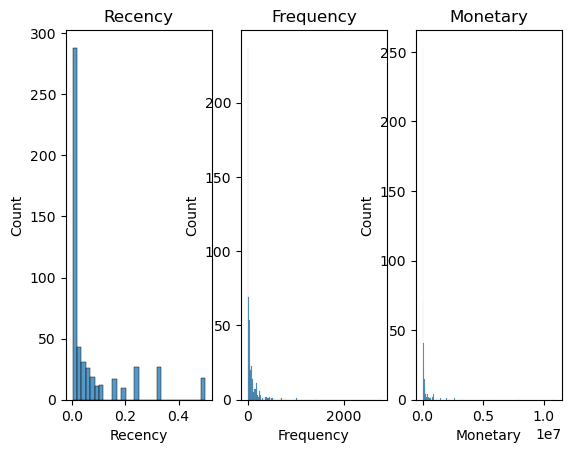

In [189]:
plt.subplot(1,3,1)
sns.histplot(1/rfm_train['Recency'])
plt.title('Recency')

plt.subplot(1,3,2)
sns.histplot(rfm_train['Frequency'])
plt.title('Frequency')

plt.subplot(1,3,3)
sns.histplot(rfm_train['Monetary'])
plt.title('Monetary')

In [183]:
from scipy import stats
x1 = 1/rfm_train['Recency']
y1, lambda_optimal1 = stats.boxcox(x1)
print(lambda_optimal1)

-0.12639608542084876


In [171]:
x2 = rfm_train['Frequency']
y2, lambda_optimal2 = stats.boxcox(x2)
print(lambda_optimal2)

-0.004793923458034165


In [173]:
x3 = rfm_train['Monetary']
y3, lambda_optimal3 = stats.boxcox(x3)
print(lambda_optimal3)

0.02572154589789941


<Axes: xlabel='Recency', ylabel='Density'>

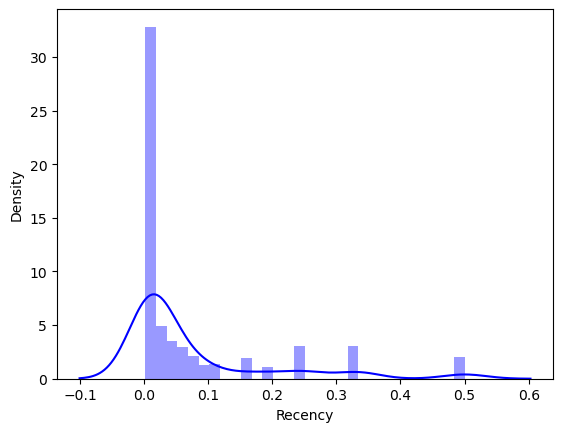

In [185]:
sns.distplot(x1, hist = True, color = 'blue')

<Axes: ylabel='Density'>

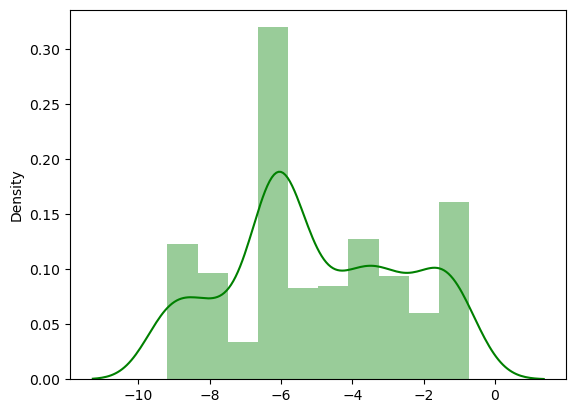

In [195]:
import numpy as np
sns.distplot(y1, hist = True, color = 'green')

<Axes: ylabel='Density'>

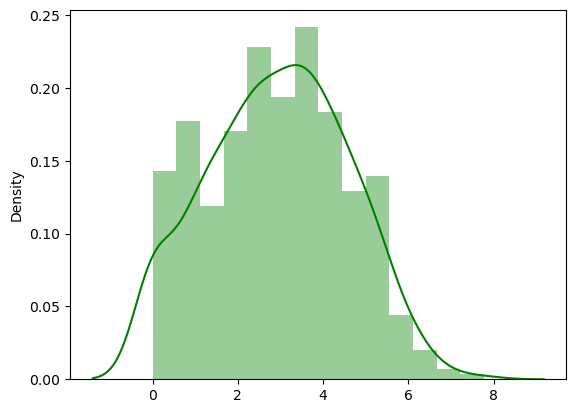

In [177]:
sns.distplot(y2, hist = True, color = 'green')

<Axes: ylabel='Density'>

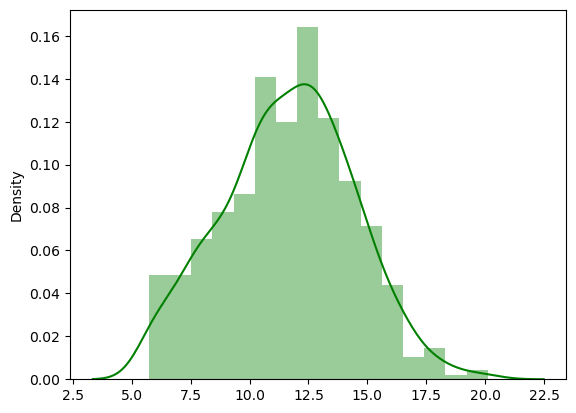

In [179]:
sns.distplot(y3, hist = True, color = 'green')

In [151]:
rfm_train_minus = rfm_train.drop('Custkey', axis = 1, inplace = True)

In [197]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
rb = PowerTransformer(method = 'box-cox')
mm = MinMaxScaler()
rfm_rb = pd.DataFrame(rb.fit_transform(rfm_train_minus), columns = rfm_train_minus.columns)
rfm_scaled = pd.DataFrame(mm.fit_transform(rfm_rb), columns = rfm_train_minus.columns)

ValueError: Expected 2D array, got scalar array instead:
array=nan.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.